### What Observable Trends Can Be Concluded?
* Based on the scatterplot, ride sharing appears to be more common in urban cities than rural cities.  This could explain why there is an staggering 2405 number of drivers in urban cities as opposed to only 78 drivers in rural cities.
* Look further at the scatterplot, fare rates in urban areas ranged between 20 to 30 dollars, suburban areas ranged between 25 to 35 dollars, and rural areas ranged between 25 to 45 dollars.  Fare rates were likely much lower in urban areas as opposed to rural ares because of the common use of ride sharing.
* Approximately 80.89% of drivers flock to urban areas, 16.48% to suburban areas, and 2.62% to rural areas.  Despite lower fare rates to customers, urban cities appear to be the best spot for drivers to do business.

In [49]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [51]:
# Read the City Data
city_df = pd.read_csv("data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [52]:
# Read the Ride Data
ride_df = pd.read_csv("data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Merge Dataframes

In [53]:
# Combine the data into a single dataset
# Display the data table for preview
ride_city_df = pd.merge( ride_df, city_df, on="city", how = "left")
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Urban City Dataframe

In [54]:
# Count the number of urban ride ids, calculate average fare, and count the number of drivers.   
ride_urban_type_df = ride_city_df[ride_city_df["type"]=="Urban"]
ride_urban_city_df = ride_urban_type_df.groupby(["city"]).count()["ride_id"]
ride_urban_fare_df = ride_urban_type_df.groupby(["city"]).mean()["fare"]
number_drivers_urban_df = ride_urban_type_df.groupby(["city"]).mean()["driver_count"]
print(number_drivers_urban_df.head(3))

city
Amandaburgh    12.0
Barajasview    26.0
Carriemouth    52.0
Name: driver_count, dtype: float64


## Suburban City Dataframe

In [55]:
# Count the number of suburban ride ids, calculate average fare, and count the number of drivers. 
ride_suburban_type_df = ride_city_df[ride_city_df["type"]=="Suburban"]
ride_suburban_city_df = ride_suburban_type_df.groupby(["city"]).count()["ride_id"]
ride_suburban_fare_df = ride_suburban_type_df.groupby(["city"]).mean()["fare"]
number_drivers_suburban_df = ride_suburban_type_df.groupby(["city"]).mean()["driver_count"]
print(number_drivers_suburban_df.head(3))

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Name: driver_count, dtype: float64


## Rural City Dataframe

In [56]:
# Count the number of rural ride ids, calculate average fare, and count the number of drivers. 
ride_rural_type_df = ride_city_df[ride_city_df["type"]=="Rural"]
ride_rural_city_df = ride_rural_type_df.groupby(["city"]).count()["ride_id"]
ride_rural_fare_df = ride_rural_type_df.groupby(["city"]).mean()["fare"]
number_drivers_rural_df = ride_rural_type_df.groupby(["city"]).mean()["driver_count"]
print(number_drivers_rural_df.head(3))

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Name: driver_count, dtype: float64


## Bubble Plot of Ride Sharing Data

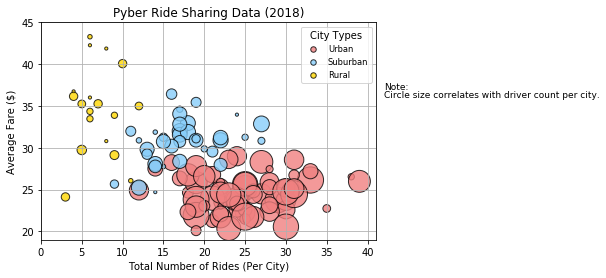

In [57]:
# Obtain the x and y coordinates for each of the three city types.
# Build the scatter plots for each city types.
plt.scatter(ride_urban_city_df, ride_urban_fare_df, s = 10*number_drivers_urban_df, linewidths = 1, marker = "o", 
            alpha = 0.8, facecolors = "Lightcoral", edgecolor="Black", label="Urban")

plt.scatter(ride_suburban_city_df, ride_suburban_fare_df, s=10*number_drivers_suburban_df, linewidths = 1, marker = "o", 
            alpha = 0.8, facecolors = "Lightskyblue", edgecolor="Black", label="Suburban")

plt.scatter(ride_rural_city_df, ride_rural_fare_df, s = 10*number_drivers_rural_df, linewidths=1, marker="o", 
            alpha=0.8, facecolors = "Gold", edgecolor = "Black", label = "Rural")

# Incorporate the other graph properties.
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim((0,41))
plt.ylim(19,45)
plt.grid()

# Create a legend
legend = plt.legend(fontsize = "small", numpoints = 1, scatterpoints = 1, mode="Expanded", loc="upper right", 
                    title = "City Types", labelspacing = 0.5)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size.
plt.text(42, 37, "Note:", fontsize = 9)
plt.text(42, 36, "Circle size correlates with driver count per city.", fontsize = 9)

# Save Figure
plt.savefig("../Images/ScatterPlot.png")

plt.show()

## Total Fares by City Type

In [58]:
# Calculate Fare Percents
fare_percent_df = ride_city_df.groupby("type")["fare"].sum()
fare_percent_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

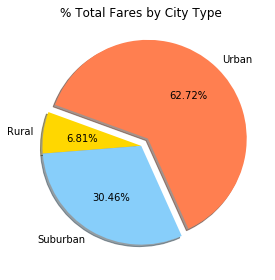

In [59]:
# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.title("% Total Fares by City Type")
plt.pie(fare_percent_df, explode = explode, labels = labels, 
        colors = colors, autopct = "%1.2f%%", shadow = True, startangle = 160)
plt.tight_layout()

# Save Figure
plt.savefig("../Images/FarePieChart.png")

plt.show()

## Total Rides by City Type

In [60]:
# Calculate Total Ride Percents
ride_percent_df = ride_city_df.groupby("type")["ride_id"].count()
ride_percent_df

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

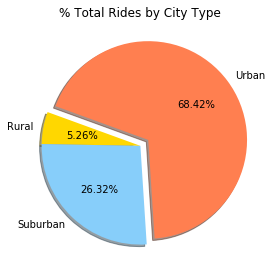

In [62]:
# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.title("% Total Rides by City Type")
plt.pie(ride_percent_df, explode = explode, labels = labels, 
        colors = colors, autopct = "%1.2f%%", shadow = True, startangle = 160)
plt.tight_layout()

# Save Figure
plt.savefig("../Images/RidesPieChart.png")

plt.show()

## Total Drivers by City Type

In [63]:
# Calculate Total Driver Percents
driver_percent_df = city_df.groupby("type")["driver_count"].sum()
driver_percent_df

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

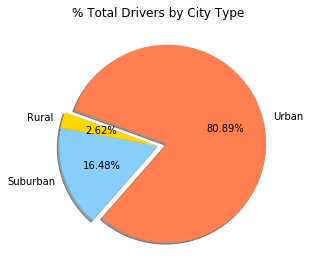

In [64]:
# Build Pie Charts
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.title("% Total Drivers by City Type")
plt.pie(driver_percent_df, explode = explode, labels = labels, 
        colors = colors, autopct = "%1.2f%%", shadow = True, startangle = 160)
plt.tight_layout()

# Save Figure
plt.savefig("../Images/DriverPieChart.png")

plt.show()
